# Abalone

In [3]:
# Data frames.
import pandas as pd

# Lists
import numpy as np

# Plots
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Statistical plots.
import seaborn as sns

# Scipy for statistics functions
from scipy import stats

# Machine Learning.
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## ML&S - Autumn Tasks

### 2. Reading Data from CSV

In [4]:
# Reading and saving data from abalone.csv as a pandas database
abaloneData = pd.read_csv("data/abalone.csv")

# Checking shape
abaloneShape = abaloneData.shape
print("abaloneData has {} rows and {} columns".format(abaloneShape[0], abaloneShape[1]))

# A look at the data
abaloneData.head()

abaloneData has 4177 rows and 9 columns


sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### 3. Classifications and Measurement Scales

#### Attribute information 
Taken from data source, UC Irvine Machine Learning Repository. Ref: https://archive.ics.uci.edu/dataset/1/abalone

| Name           | Data Type | Measurement| Description                       |
| -------------- | ----------| ---------- | --------------------------------- |
| Sex            | nominal   | M, F, and I| (infant)                          |
| Length         | continuous| mm         | Longest shell measurement         |
| Diameter       | continuous| mm         | perpendicular to length           |
| Height         | continuous| mm         | with meat in shell                |
| Whole weight   | continuous| grams      | whole abalone                     |
| Shucked weight | continuous| grams      | weight of meat                    |
| Viscera weight | continuous| grams      | gut weight (after bleeding)       |
| Shell weight   | continuous| grams      | after being dried                 |
| Rings          | integer   |            | +1.5 gives the age in years       |

#### Categorical Data
* **Nominal Data**  
In the above table, Sex has been identified as a Nominal Data Type. Nominal data has mutually exclusive categories and the values do not have any specific order. For an Abalone, these categories have been identified as: (M for Male, F for Female and I for Infant.).
Ref: https://en.wikipedia.org/wiki/Nominal_category

* **Ordinal Data**  
Ordinal data, is when the data has defined categories such as in Nominal Data, but ordinal data does have have an order to these categories. An exampe might be a dial with "Low", "Medium" and "High" settings on a toaster, we do not inherently know that these settings are equally spaced on some relevant scale, but we can inherently interpret their order.
Ref: https://en.wikipedia.org/wiki/Ordinal_data

* **Discrete Data**  
Discrete data is a categorical Data Type, it has categories and order like the ordinal data, but additionally we know the interval between these values. An example here could be the number of wins in a season a team achieved. There is an upper and lower limit to this data with higher values being better, and a win is a discrete event as the interval.

#### Numerical Data
* **Continuous Data**  
In the above table, length measurements and weight measurements have been identified as Continuous Data. Data is continuous when it can take any value. For a growing Abalone, their lenght and weight meaurements are slowly but steadily increasing and changing as it grows.

* **Integer Data**  
In the above table, the ring count has been identified as an interger. Intergers can only be positive or negative whole numbers, or nothing as in 0. In this case the count of rings on an Abalone, it can not have half rings.

In [5]:
# Checking Python data types on the loaded database
abaloneData.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

#### Python Data Types
* **objects**  
In the above table, sex has been identified as an object. Objects can be numerical values such as intergers or floating point numbers, or strings and even lists. In this case the dataframe type has also been identified as a object as it contains a list of values of different types.

* **float64 Data**  
In the above table, lenght measurements and weight measurements have been identified as floating point numbers. This is beacuse the values are numerical values only, which contain decimal places as the data is continuious.

* **int64 Data**  
In the above table, ring count has been identified as an integer. This saves memory as the ring counts can only be integers as discussed above.

* **Boolean**  
Data can also be set as a Boolean value in python. This means the data only has two states it can take, often 0 or 1, or True or False. Saving this data as a Boolean can use less memory .

#### Units
* **Millimeters**  
A metric unit of length equal to one thousandth of a metre.

* **Grams**  
A metric unit of mass equal to one thousandth of a kilogram.

In [6]:
# Putting this attribute information into a callable database for the plots below
attributeInformation = {
    # Nicely formatted column names
    "Name": [
        "Sex", "Length", "Diameter", "Height", "Whole weight", 
        "Shucked weight", "Viscera weight", "Shell weight", "Rings"
    ],
    "Data Type": [
        "nominal", "continuous", "continuous", "continuous", "continuous", 
        "continuous", "continuous", "continuous", "integer"
    ],
    "Meas.": [
        ["M", "F", "I"], "mm", "mm", "mm", "grams", 
        "grams", "grams", "grams", "total count"
    ],
    "Description": [
        "(infant)", "Longest shell measurement", "perpendicular to length", 
        "with meat in shell", "whole abalone", "weight of meat", 
        "gut weight (after bleeding)", "after being dried", "+1.5 gives the age in years"
    ]
}

### 4. Exploring data

#### Checking if this data has any NaN values
This is being done using the dropna() function, to dropping any rows which contain a NaN value. Then to check how many rows have been dropped, the new dataframe shape is compared to the origional dataframe shape from above.

In [7]:
# Cleaning Data of NaN values
abaloneData.dropna()

# Getting change in data shape, old - new
deltaRows = int(abaloneShape[0])-int(abaloneData.shape[0])
deltaColumns = int(abaloneShape[1])-int(abaloneData.shape[1])

# Checking shape post cleaning
print("abaloneData has lost {} rows and {} columns".format((deltaRows),
        (deltaColumns)))

abaloneData has lost 0 rows and 0 columns


The data has not lost any rows or columns, meaning all cells are populated with data

#### Looking at the data values and spread

In [8]:
# information of the data
abaloneData.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

We can see in the table above that the data has aready been preperated for statistical and machine learning analysis. The data, with the exception of rings column, has been scaled to mostly range from 0 to 1. The rings is an exception here as this is a discrete variable as discussed above.

#### Important summary Statistics
**Mean**  
$ \mu = \frac{1}{N} \sum_{i=1}^{N} x_i $

Where:
- $ \mu $ = mean
- $ N $ = number of data points
- $ x_i $ = each individual data point

A mean is a numeric quantity representing the center of a collection of numbers  
**Standard deviation**  
$ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2} $

Where:
- $ \sigma $ = standard deviation
- $ N $ = number of data points
- $ x_i $ = each individual data point
- $ \mu $= mean of the data points

A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low, or small, standard deviation indicates data are clustered tightly around the mean, and high, or large, standard deviation indicates data are more spread out.

**Min**  
The least elements in the set

**Max**  
The greatest elements in the set



#### Looking at the Sex

In [9]:
def sexPercentage(data):
    # Geatting a count of each sex and saving it to a dictionary
    sexCount = {
        'Infants' : (data['sex'] == 'I').sum(),
        'Females' : (data['sex'] == 'M').sum(),
        'Males' : (data['sex'] == 'F').sum(),
        }
    
    # Having a look at the totals for each sex
    print("There are {} Infants, {} Males and {} Females in this dataframe".format(sexCount['Infants'], sexCount['Females'], sexCount['Males']))

    # Getting percentage of each sex for plots below
    # Need total population for percentage
    total = len(data['sex'])
    
    # Saving the percentages to a dictionary
    sexPercentages = {
        'Infants': round((sexCount['Infants'] / total) * 100, 2),
        'Females': round((sexCount['Females'] / total) * 100, 2),
        'Males': round((sexCount['Males'] / total) * 100, 2)
        }
    
    # Having a look the percentage split
    print("Infant Percent: {}\nFemale Percent: {}\nMale Percent: {}".format(sexPercentages['Infants'], sexPercentages['Females'], sexPercentages['Males']))
    return sexPercentages

In [10]:
sexPercentages = sexPercentage(abaloneData)

There are 1342 Infants, 1528 Males and 1307 Females in this dataframe
Infant Percent: 32.13
Female Percent: 36.58
Male Percent: 31.29


### 5. Plotting data

#### Using a histogram to visualise the sex distribution

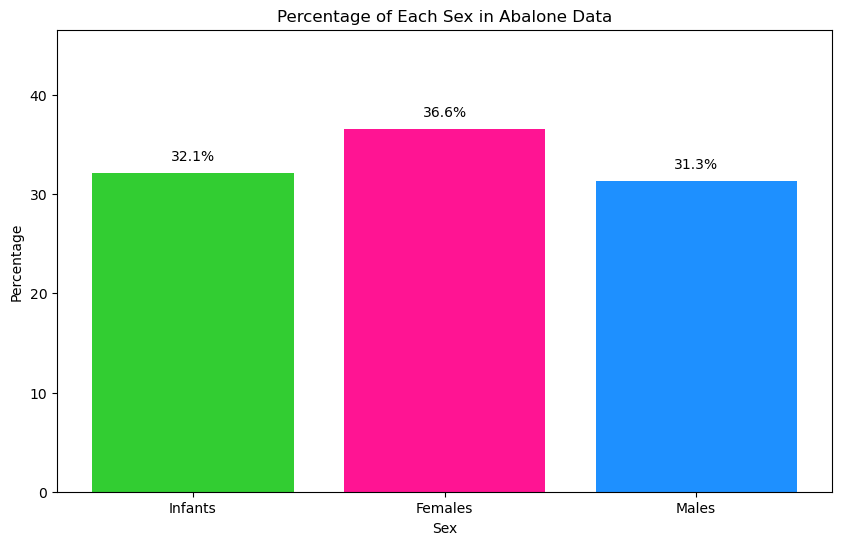

In [11]:
# Using functions so i can call this again leter if needed
# This function takes in the a dictionary and outputs histograms
def percentageBarplot(data):
    # Setting size for barchart
    plt.figure(figsize=(10, 6))
    # Saving the barchart to an object so it can be called below
    # plotting the catagories of sex Vs the percentage if hold of the population
    bars = plt.bar(list(data.keys()), list(data.values()), color=['limegreen', 'deeppink', 'dodgerblue'])

    # Add percentage labels on top of each bar. These were generated using ChatGPT
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

    # Anding Title, axis lables and shaping the plot using ylim
    plt.title('Percentage of Each Sex in Abalone Data')
    plt.xlabel('Sex')
    plt.ylabel('Percentage')
    plt.ylim(0, max(list(sexPercentages.values())) + 10)  # Add some space above the tallest bar for the label
    plt.show()

# Calling plot
percentageBarplot(sexPercentages)

A bar chart is an appropriate plot for the sex column as the data is Nominal. It is clear from this plot that the data is close to being evenly distributed across the 3 sex categories

#### Looing at a histagram of each numerical variable  

Histagrams give a good visualisation of the mean, skew and spread of data.

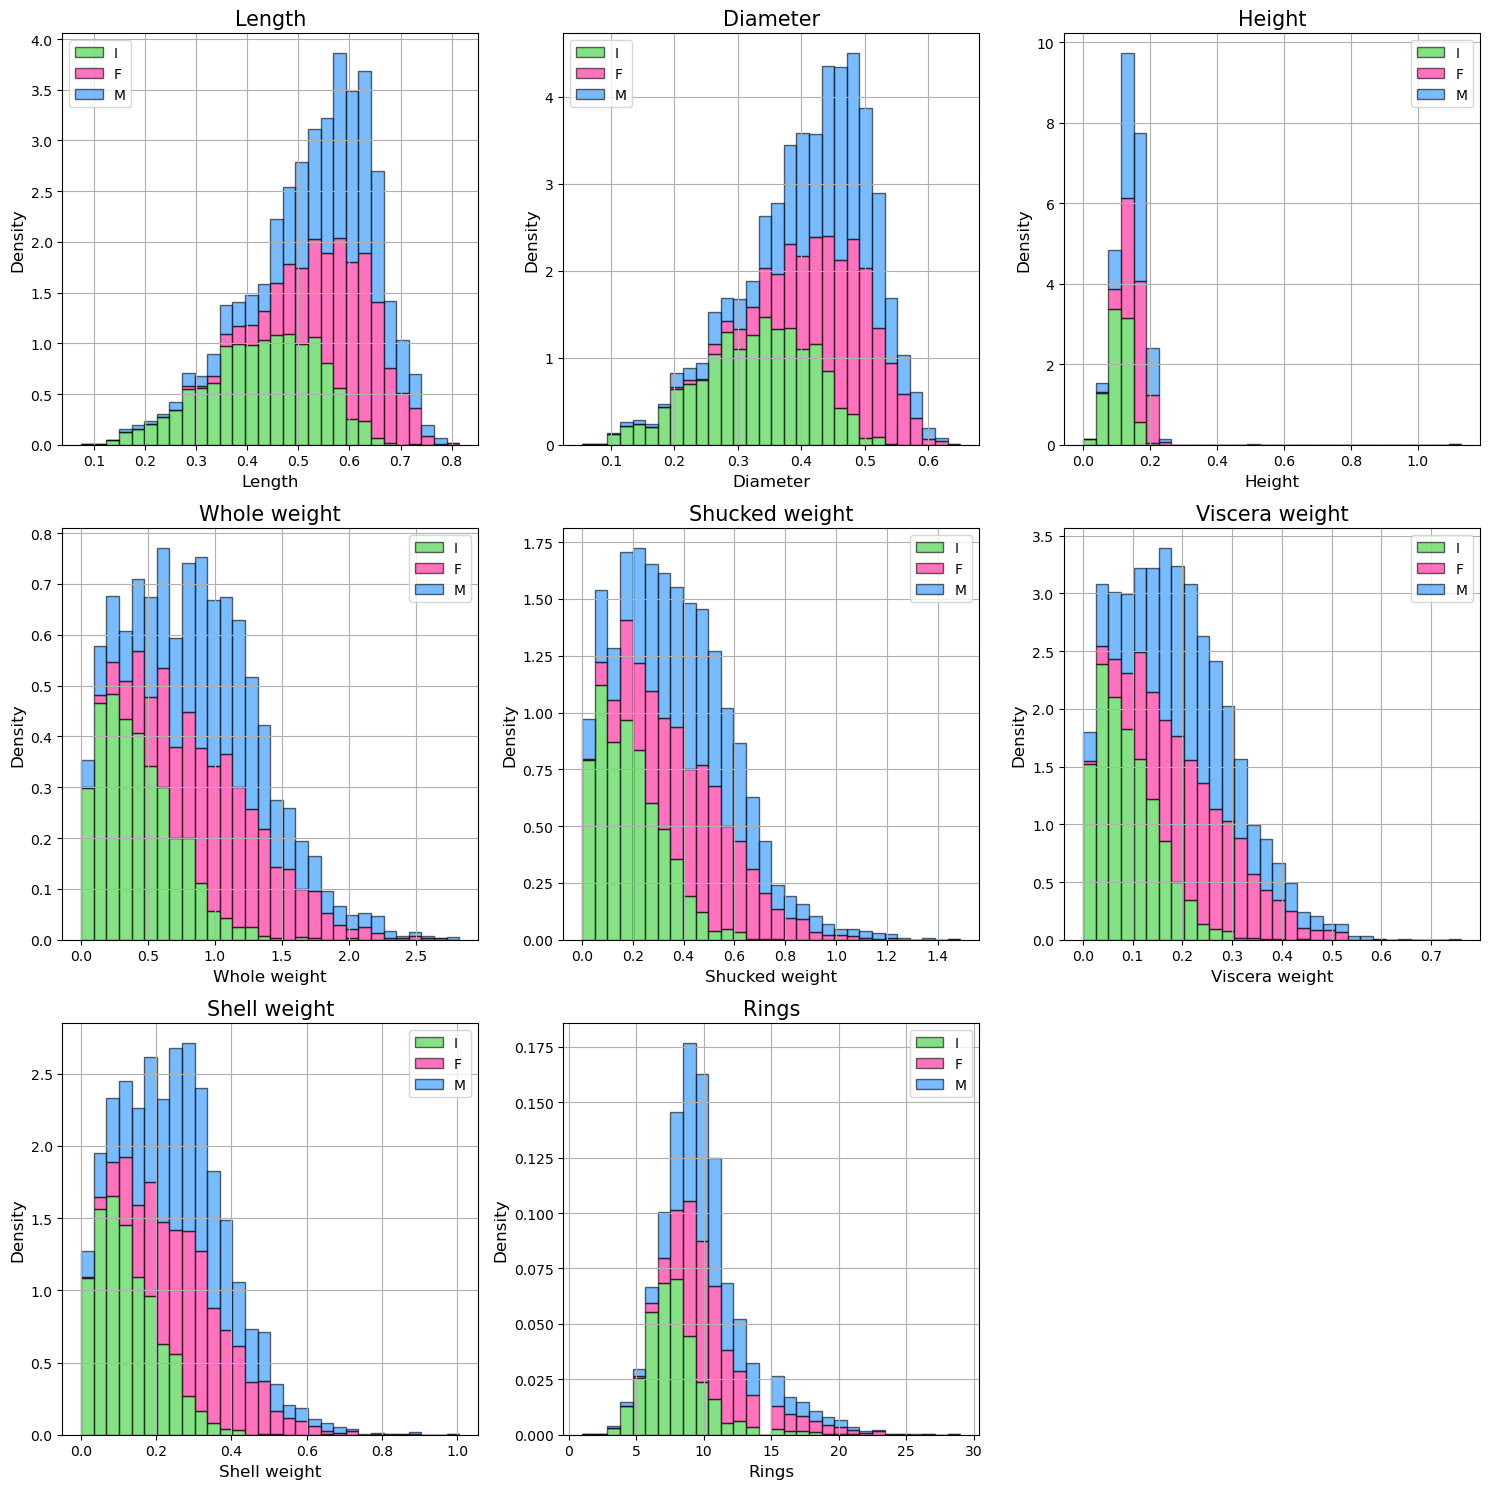

In [12]:
# Plotting a histogram for each feature and colouring it by sex
def plotHistDensity(data, attributeInformation):
    # Setting up the standard colour choice
    colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'}
    
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    
    # Making the plot large
    plt.figure(figsize=(15, 15))

    # There are 8 features to plot
    for i in range(1, 9):
        # Setting up a sub plot for the features
        # From testing 3x3 grid looks best
        plt.subplot(3, 3, i)

        # Prepare data for each histogram.
        # Filter the dataframe column sex for each of the colours dictionary keys, creating 3 lists of data seperated by sex, which are saved in a list.
        featureBySex = [data[data['sex'] == sex][abaloneCols[i]] for sex in list(colors.keys())]
        #if i == 1:
        #    print(data_to_plot)

        # Plot the stacked histogram using stacked = True, using the feature list which has been seperated into list by sex
        plt.hist(featureBySex, bins=30, density=True, stacked=True, color=list(colors.values()), edgecolor='black', label=list(colors.keys()), alpha=0.6)

        # Adding a title and labels
        plt.title(abaloneColsNames[i], size=15, color='black')
        plt.xlabel(abaloneColsNames[i], size=12, color='black')
        plt.ylabel('Density', size=12, color='black')

        # Move legend to upper left for first and second plots
        if i == 1 or i == 2:
            plt.legend(loc='upper left')
        else:
            plt.legend(loc='upper right')

        # Adding the grid
        plt.grid(True)

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

plotHistDensity(abaloneData, attributeInformation)

**These Histograms give some insights into the data.**   
* Infants consitently have the smallest mean, which would make sense as we would expect an infant abalone to be physically smaller and lighter than an adult abalone.  
* Males and Females are relativly very similar in size and weight
* There appear to be some outliers in the height that are significantly away from the mean

#### Looking at a plot of each variable Vs Ring count

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

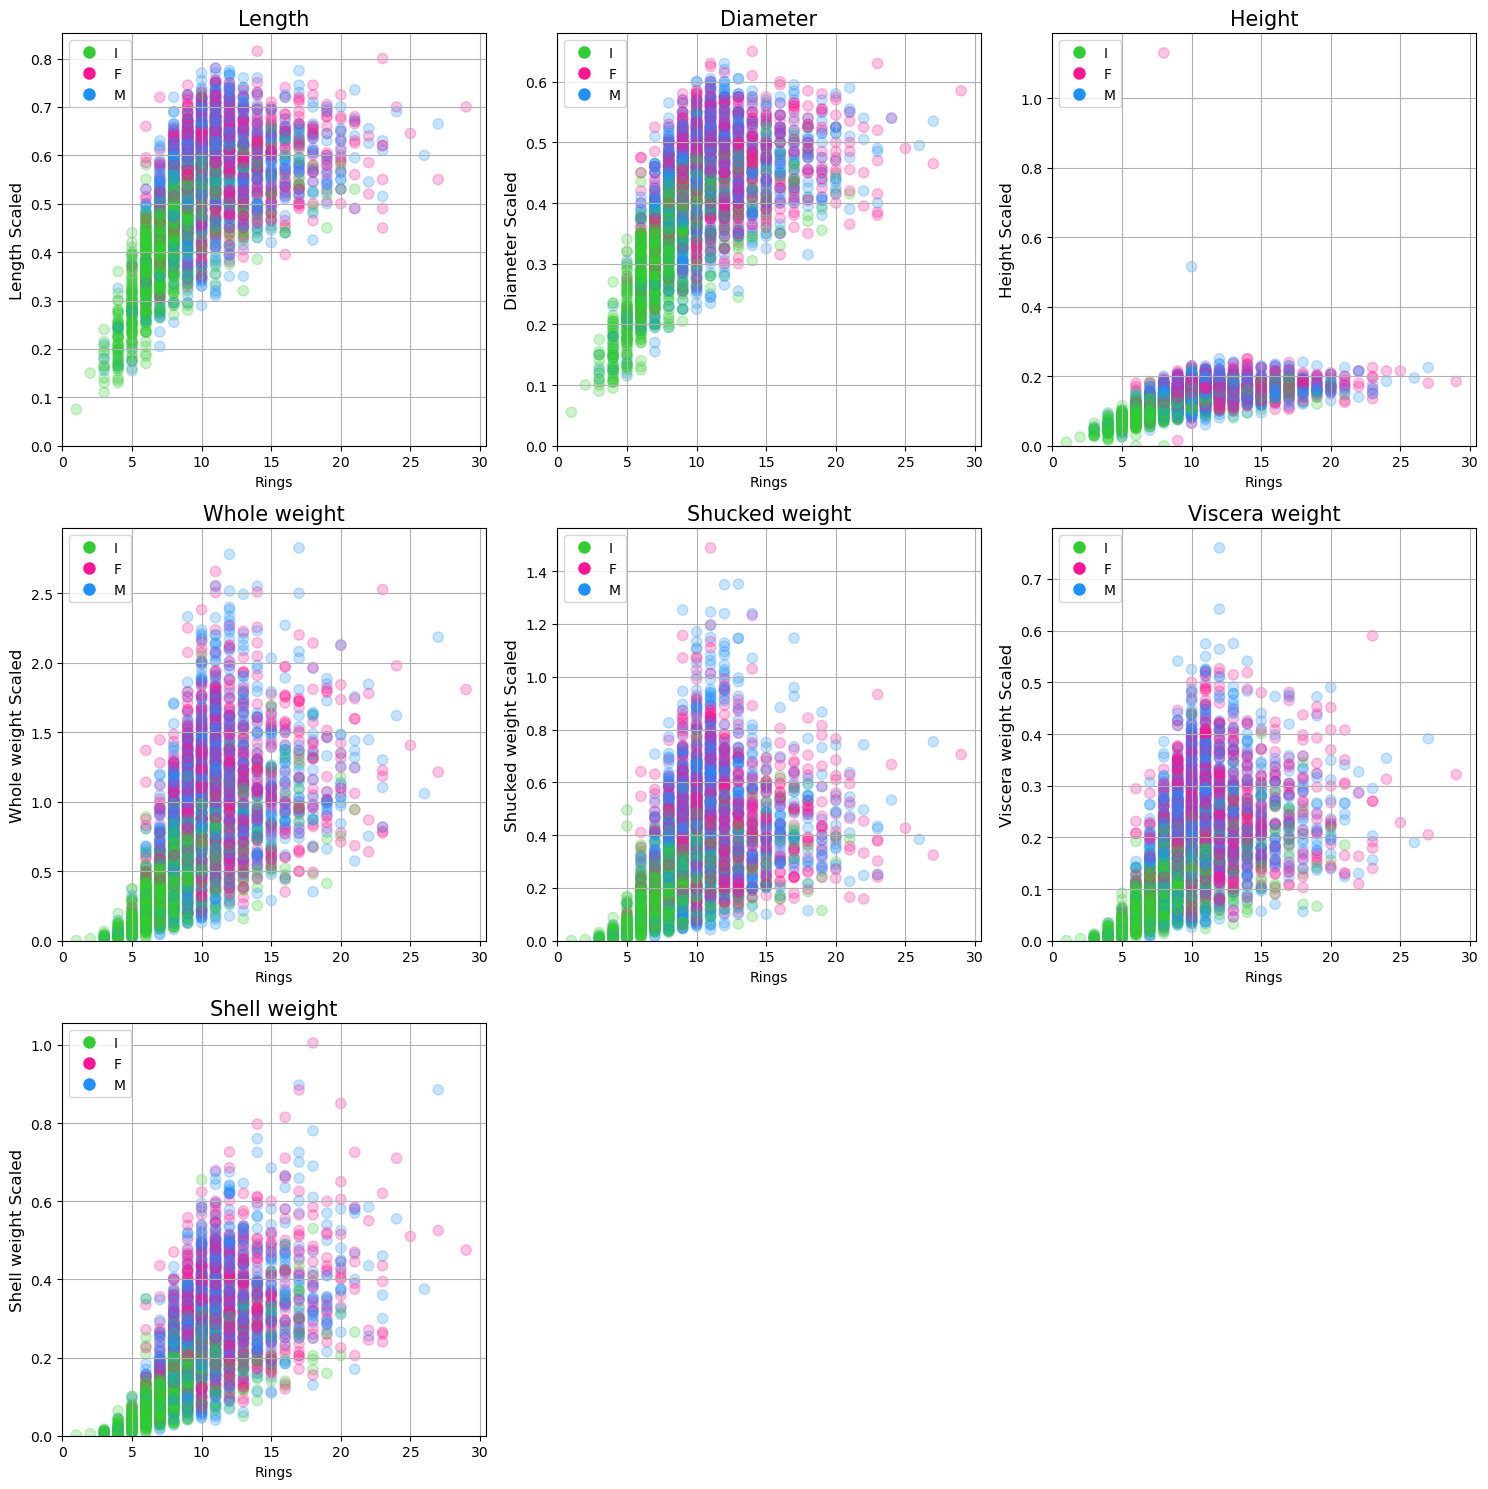

In [13]:
def plotSexColour(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Setting up the standard colour choice
    colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'}


    # Making the plot large, as there is good quality given the large sample size
    plt.figure(figsize=(15, 15))

    # There are 7 features to plot this time but keeping the 3x3 grid
    for i in range(1, 8):
        plt.subplot(3, 3, i)
       
       # Extracting the features to be plot
        x = data['rings']
        y = data[abaloneCols[i]]

        # mapping the colours of each data point into a list, to be applied when making scatter plot
        z = abaloneData['sex'].map({'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'})

        # Making each scatter plot
        # Using large 55 size data points to fill gaps, and alpha 0.25 to see data point beneath each other.
        plt.scatter(x, y, s=55, color=z, alpha=0.25)

        # Adding a title, axis labels, legend and gridlines as part of the function
        plt.title(str(abaloneColsNames[i]), size=15, color='black')
        plt.xlabel('Rings')
        plt.ylabel(f"{abaloneColsNames[i]} Scaled", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        # geting min and max values on x axis
        x_min, x_max = plt.xlim()
        # if the lowest value was not zero, it is set to zeo
        x_min = 0
        # now plotting over this new range that includes zero
        plt.xlim(x_min, x_max)

        # Adding a tick at 0 on the y-
        # geting min and max values on y axis
        y_min, y_max = plt.ylim()
        # if the lowest value was not zero, it is set to zeo
        y_min = 0
        # now plotting over this new range that includes zero
        plt.ylim(y_min, y_max)
        
        # Using line2D to add a legend, there will be no line, just one data point
        # the markerfacecolor and label are being read from the colors dictionary
        legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                            for label, color in colors.items()]
        # then putting these 3 lines into a legend
        plt.legend(handles=legend_handles, loc='upper left')

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

plotSexColour(abaloneData, attributeInformation)

**These Scatter Plots give some insights into the data.** 
* Again the infants tend to have the lowest ring counts and the smallest mean feature values.
* We can see there is significant overlap in the age Vs the feature dimensions for each Sex. There is no clear seperation of Male or Female data here

### Errorbar subsampling

An error bar plot might be easier to interperate differences in feature characteristics based on the sex classes. This will be done by first grouping by sex. Then getting the mean feature value at each ring count and plotting these points for how the mean feature changes with ring count. The standard deviation at each ring count will also be calculated and added to the plot as an error bar.

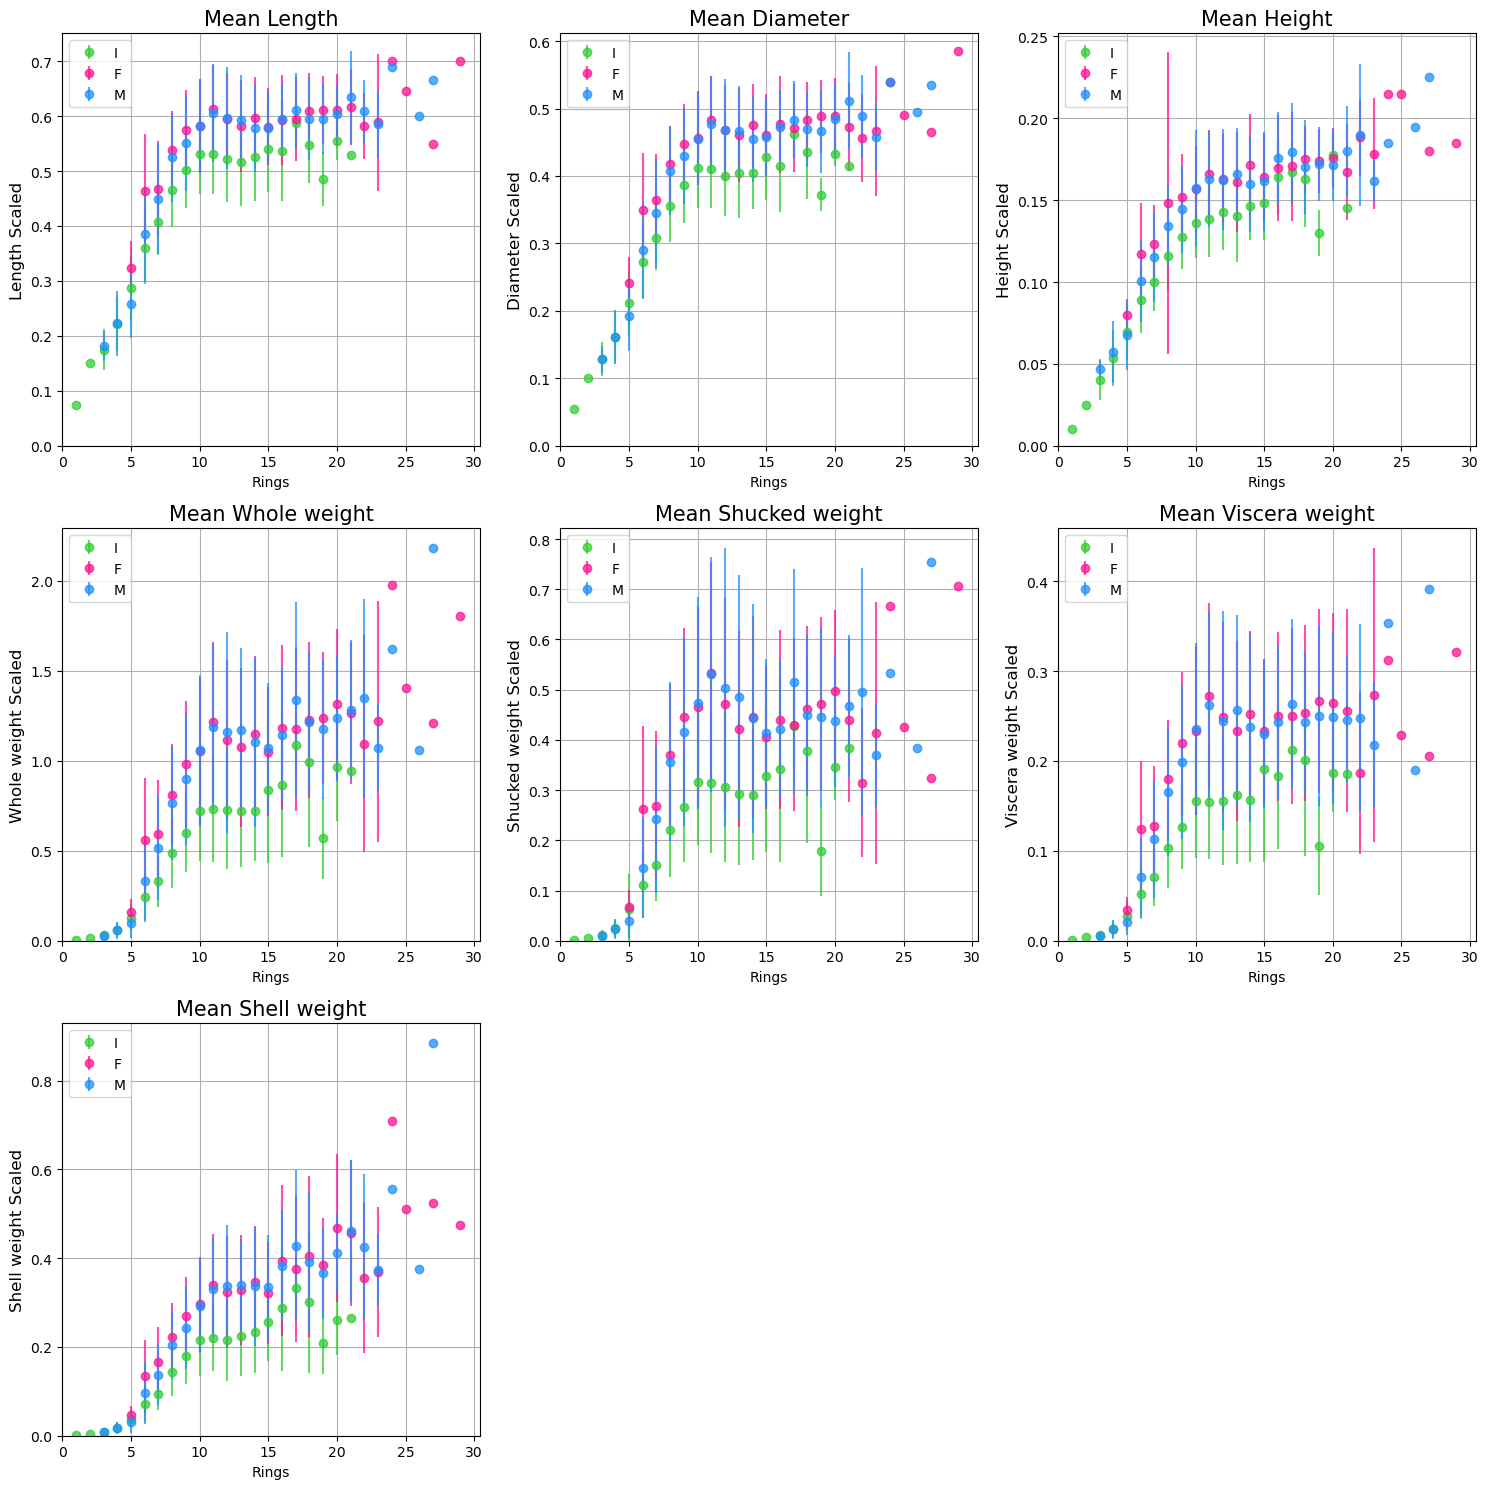

In [14]:
def plotAverageBySexWithErrorBars(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Using the same color scheme 
    colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'}

    # Making the plot large
    plt.figure(figsize=(15, 15))

    # Again there are 7 features to plot here
    for i in range(1, 8):
        plt.subplot(3, 3, i)
    
        # Isolating feature to be plotted
        feature = abaloneCols[i]

        # Calculate the mean and standard deviation for each feacture, the data is grouped by sex and then the mean and standard deviation is found for each ring count
        # Using the pandas .agg() method to appl
        featureStats = data.groupby(['rings', 'sex'])[feature].agg(['mean', 'std', 'count']).reset_index()


        # Testing removing this line and changing sem to std
        #featureStats['sem'] = featureStats['std'] / np.sqrt(featureStats['count'])



        # Plot the means with error bars using errorbar
        # Making each plot 3 times, this is printing each sex onto the plots one at a time
        for sex in list(colors.keys()):
            # filtering for the sex in this print
            featureStatsBySex = featureStats[featureStats['sex'] == sex]

            # Plotting the error bars, the error bar in the y axis is showing the length of one standard deviation
            # There is no line between the markers as this makes the plot very overcrouded, and in high ring cound the data becomes erratic in value
            plt.errorbar(featureStatsBySex['rings'], featureStatsBySex['mean'], yerr=featureStatsBySex['std'], 
                         marker='o', linestyle='none', color=colors.get(sex, 'grey'), label=sex, alpha = 0.75)

        # Adding a title, axis labels, legend and grid on each plot
        plt.title(f"Mean {abaloneColsNames[i]}", size=15, color='black')
        plt.xlabel('Rings')
        plt.ylabel(f"{abaloneColsNames[i]} Scaled", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        # geting min and max values on x axis
        x_min, x_max = plt.xlim()
        # if the lowest value was not zero, it is set to zeo
        x_min = 0
        # now plotting over this new range that includes zero
        plt.xlim(x_min, x_max)

        # Adding a tick at 0 on the y-
        # geting min and max values on y axis
        y_min, y_max = plt.ylim()
        # if the lowest value was not zero, it is set to zeo
        y_min = 0
        # now plotting over this new range that includes zero
        plt.ylim(y_min, y_max)

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

plotAverageBySexWithErrorBars(abaloneData, attributeInformation)

**These Error Bar Plots give some insights into the data.** 
* For all 3 sexs, the feature means are very closely correlated up to around 8 rings.
* After around 8 rings, the are still Abalones classed as infant and they tend to be smaller and lighter that the Males or Females.

## ML&S - Autumn Project

### Machine Learning and Artifical intelegence

_**Machine learning (ML) is a branch of artificial intelligence (AI) and computer science that focuses on the using data and algorithms to enable AI to imitate the way that humans learn, gradually improving its accuracy.**_ Ref: https://www.ibm.com/topics/machine-learning  
_**Artificial intelligence, or AI, is technology that enables computers and machines to simulate human intelligence and problem-solving capabilities.**_ Ref: https://www.ibm.com/topics/artificial-intelligence

### Learning Methods

Supervised Learning Ref: https://www.ibm.com/topics/supervised-learning  
Unsupervised Learning Ref: https://www.ibm.com/topics/unsupervised-learning

#### Classification Algorithms   
Neural networks Reg: https://www.ibm.com/topics/neural-networks, Ref: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised  
Linear regression  
Logistic regression  
Clustering  
Decision trees  
Random forests 
K-Nearest Neighbors Ref: https://www.ibm.com/topics/knn   

### Neural Networks  
Activation functions Ref: https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=Sigmoid%20%2F%20Logistic%20Activation%20Function,to%200.0%2C%20as%20shown%20below. Reg: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6  

### Cleaning Data

Splitting the data into a testing set and training set

In [15]:
# Splitting the data into a training set and a test set
train, test = sk.model_selection.train_test_split(abaloneData, test_size=0.3, random_state=0)

# Checking shape of the training and test features
train.shape, test.shape

((2923, 9), (1254, 9))

In [16]:
# Ref: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
# Setting a threshold for z score
threshold_z = 2

# Getting a list of variable names to loop though
abaloneCols = train.columns

# setting up the output dataframe
trainNoOutliers = train.copy()

# for each of the variables
for i in range(1, 8):
    # create a column using pandas, which contains the z score for each variable
    trainNoOutliers['{}Outliers'.format(abaloneCols[i])] = np.abs(stats.zscore(train[abaloneCols[i]]))
    # fiter the dataframe based off this new column to remove data with too high of a z score
    trainNoOutliers = trainNoOutliers[trainNoOutliers['{}Outliers'.format(abaloneCols[i])] <= threshold_z]
    # Droping columns Ref: https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
    # Drop this new column as it is no longer needed
    trainNoOutliers = trainNoOutliers.drop('{}Outliers'.format(abaloneCols[i]), axis=1)

    # Looking at how the datframe has been changed
    print(train.shape, trainNoOutliers.shape,abaloneCols[i] )

(2923, 9) (2795, 9) length
(2923, 9) (2787, 9) diameter
(2923, 9) (2768, 9) height
(2923, 9) (2689, 9) whole_weight
(2923, 9) (2662, 9) shucked_weight
(2923, 9) (2635, 9) viscera_weight
(2923, 9) (2603, 9) shell_weight


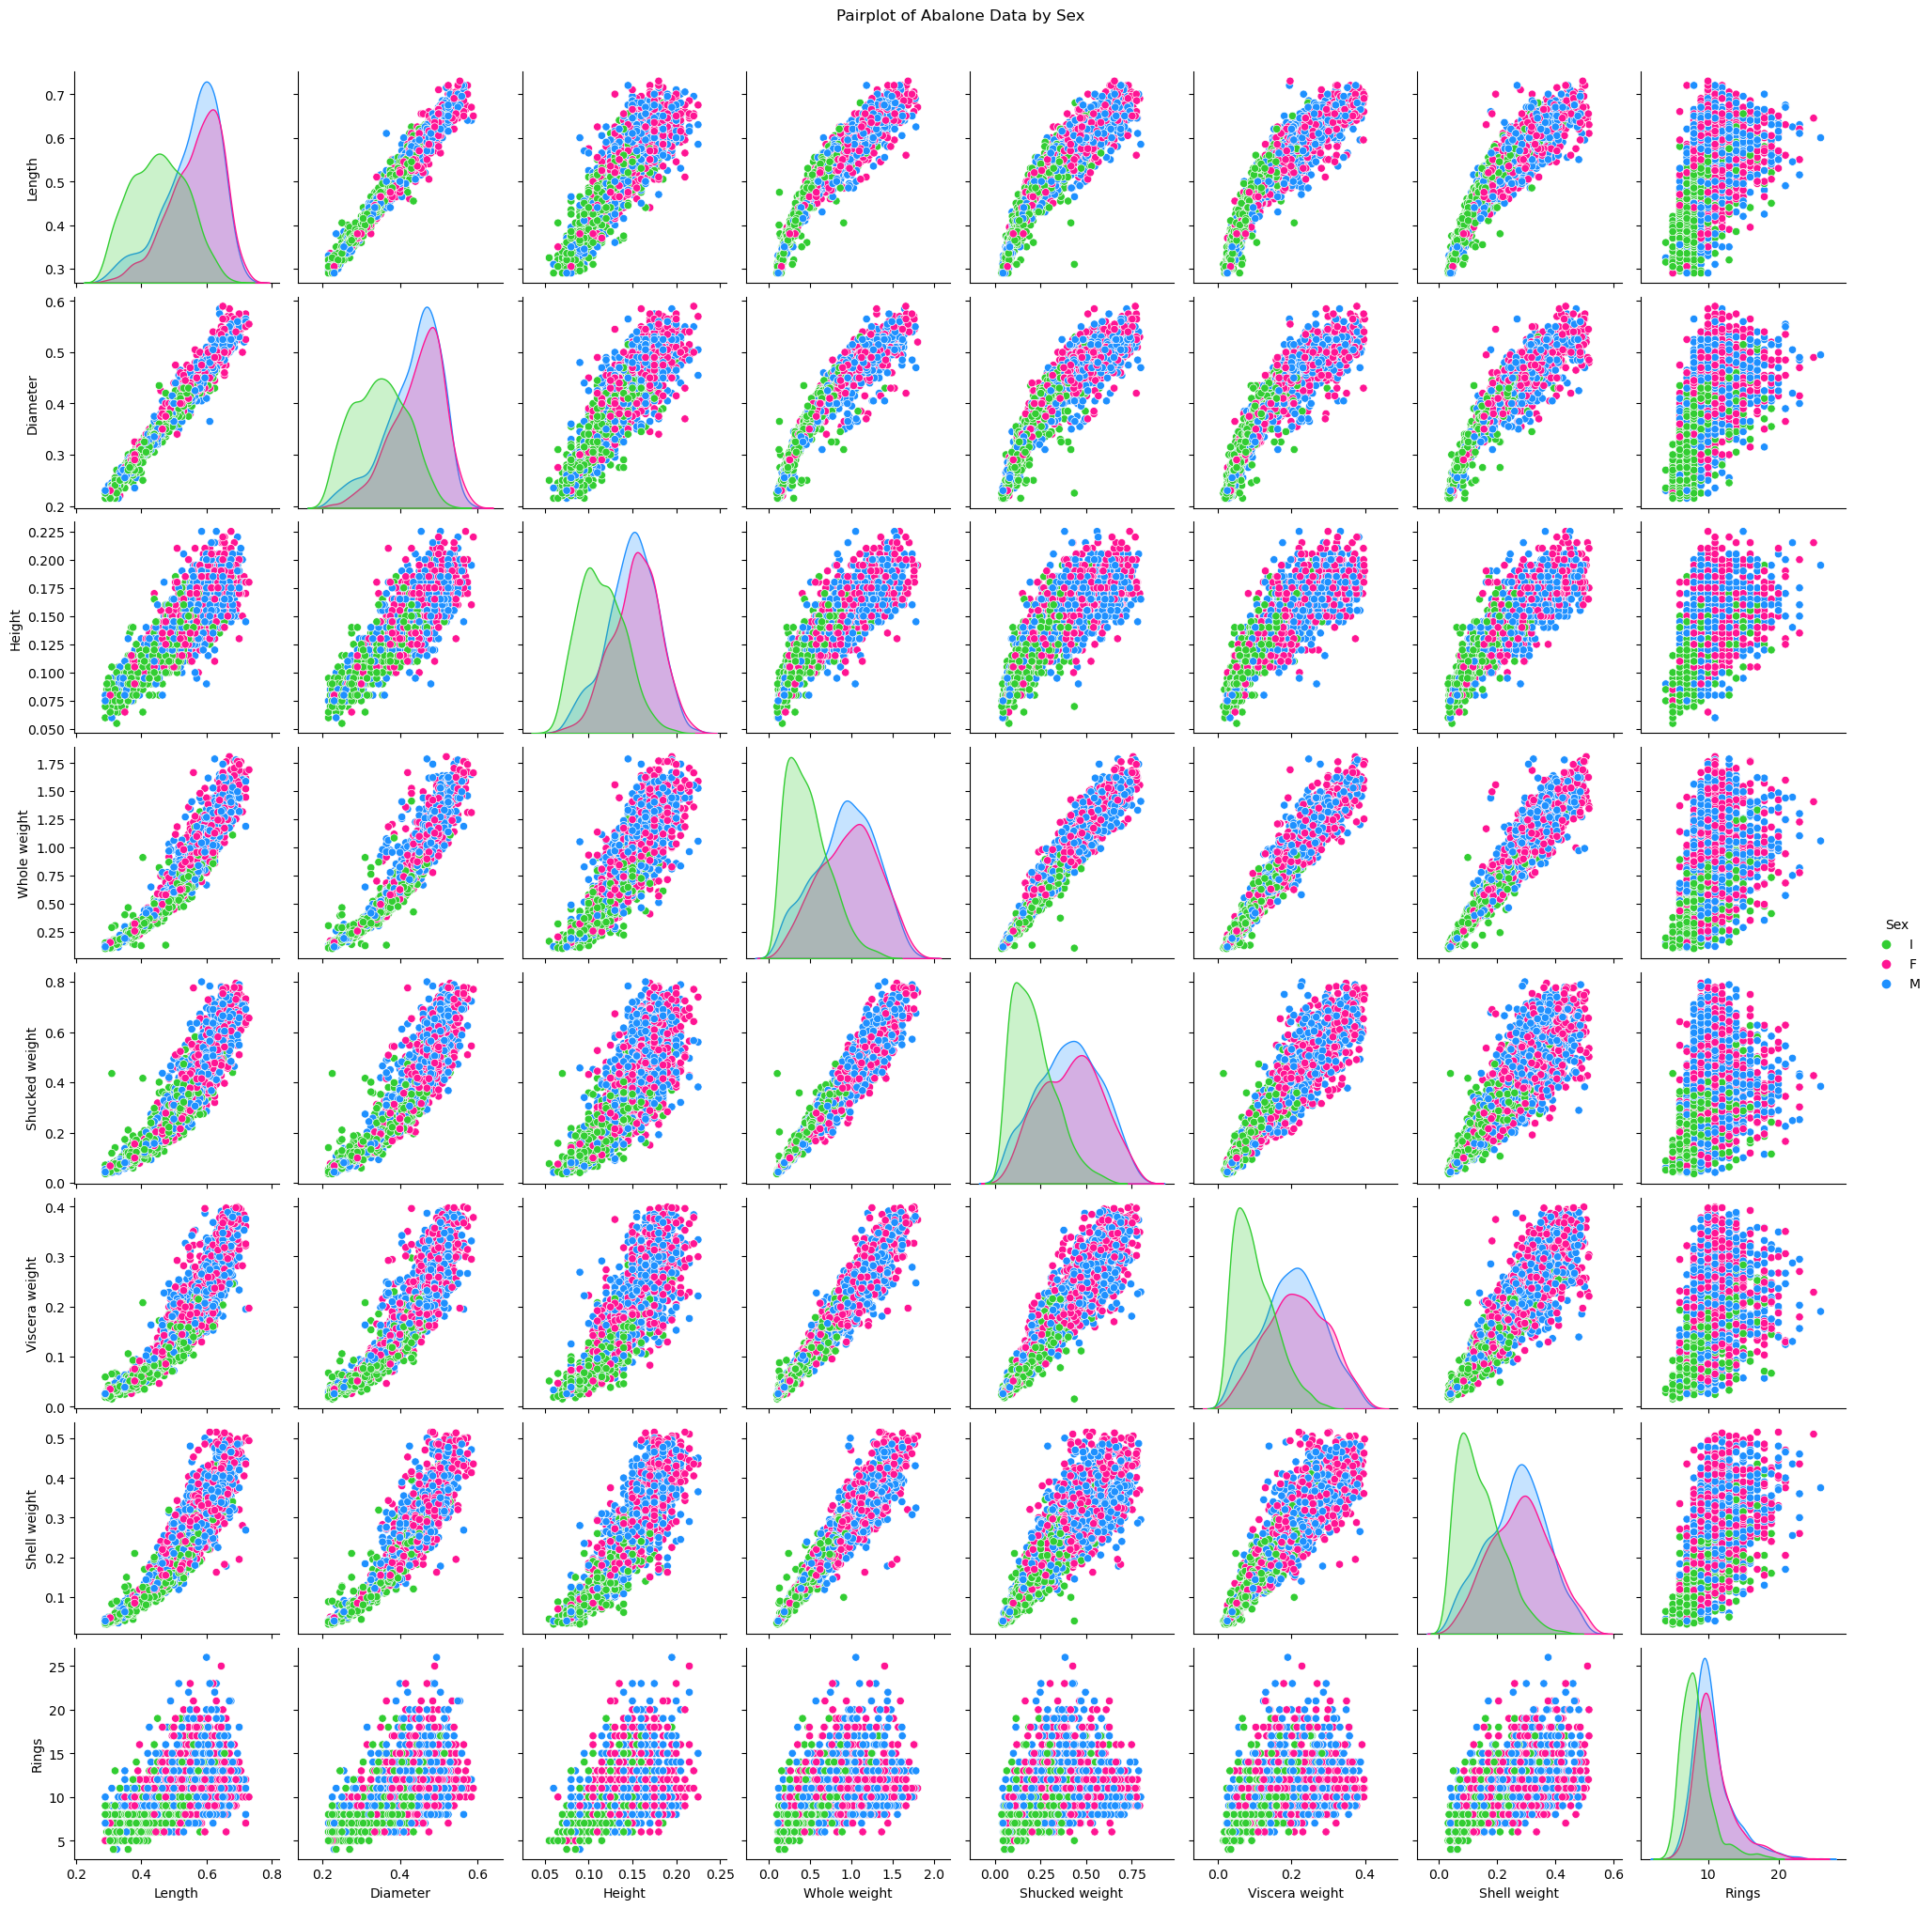

In [17]:
# Colors and palette
colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue',}
palette = [colors['I'], colors['F'], colors['M']]
hue_order = ['I', 'F', 'M']

# Create the pairplot
pairplot = sns.pairplot(trainNoOutliers, hue='sex', palette=palette, hue_order=hue_order)

# Rename axis labels using the attribute information
axis_labels = attributeInformation['Name']
num_vars = len(axis_labels)

for i in range(num_vars - 1):  # Off by one because `attributeInformation` may include the 'sex' column
    for j in range(num_vars - 1):
        if i != j:  # Scatter plots
            pairplot.axes[i, j].set_xlabel(axis_labels[j + 1])
            pairplot.axes[i, j].set_ylabel(axis_labels[i + 1])
        else:  # Diagonal plots
            pairplot.axes[i, j].set_xlabel(axis_labels[j + 1])
            pairplot.axes[i, j].set_ylabel(axis_labels[j + 1])

# Adjust plot titles and layout
pairplot.fig.suptitle('Pairplot of Abalone Data by Sex', y=1.02)
pairplot._legend.set_title('Sex')
plt.show()

### Checking Correlation

In [18]:
# Changing the sex column to a floating point 0, 0.5 or 1 for the .corr() function
# 1 = Female 
# 0 = Male
# 0.5 = Infant

# Setting up output dataframe
abaloneDataCorr = trainNoOutliers
# Changing the stings to floaring point numbers in the training data
abaloneDataCorr['sex'] = trainNoOutliers['sex'].map({'F' : 1, 'M' : 0, 'I' : 0.5})
# Changing the stings to floaring point numbers in the test data
test['sex'] = test['sex'].map({'F' : 1, 'M' : 0, 'I' : 0.5})

# Having a look
abaloneDataCorr.head(5)

sex  length  diameter  height  whole_weight  shucked_weight  \
1376  0.0   0.620     0.510   0.175        1.2815          0.5715   
1225  0.5   0.345     0.255   0.085        0.2005          0.1050   
2722  0.5   0.375     0.275   0.095        0.2295          0.0950   
3387  0.0   0.545     0.410   0.145        0.8730          0.3035   
2773  1.0   0.580     0.465   0.145        0.9865          0.4700   

      viscera_weight  shell_weight  rings  
1376          0.2385         0.390     10  
1225          0.0370         0.050      5  
2722          0.0545         0.066      7  
3387          0.1960         0.310     18  
2773          0.2155         0.250     11

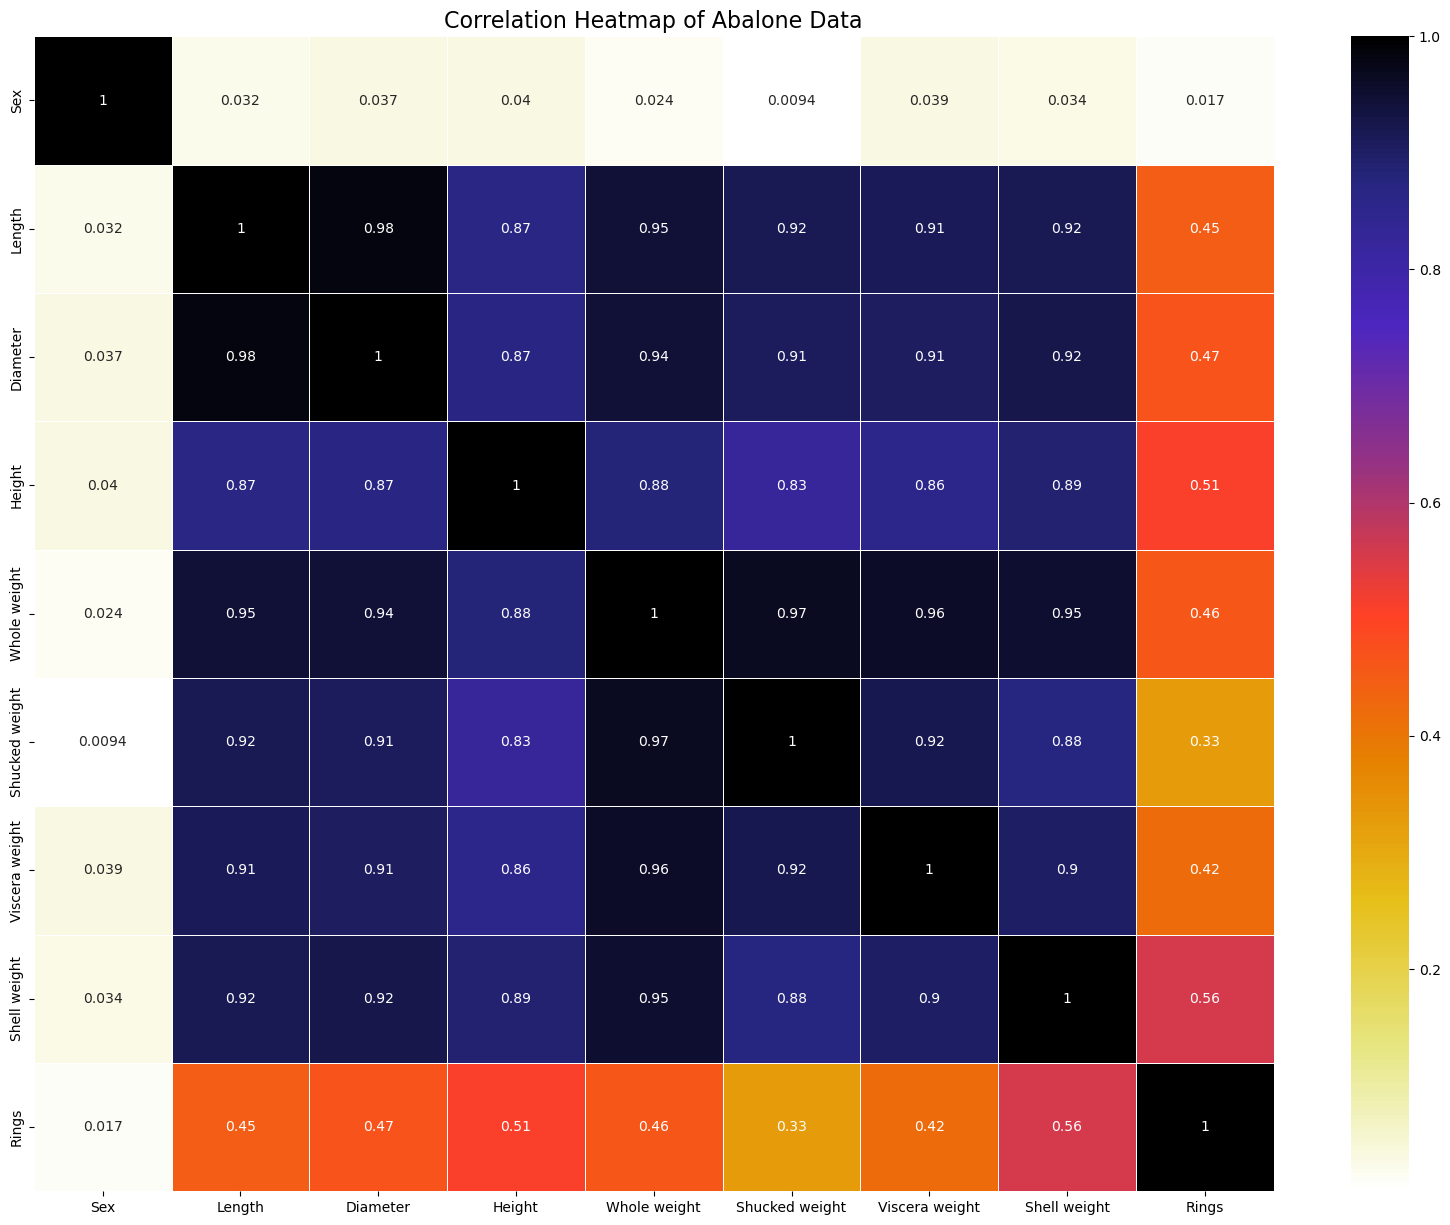

In [19]:
# Compute correlation matrix
cor = abaloneDataCorr.corr()

# Prepare labels from attributeInformation (excluding 'Sex')
labels = attributeInformation['Name']

# Plot the heatmap with labels
plt.figure(figsize=(20, 15))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, linewidths=.5, xticklabels=labels, yticklabels=labels)
plt.title('Correlation Heatmap of Abalone Data', size=16)
plt.show()

## Training a Model

Splitting the training and testing dataframes into remove the feature we are trying to predict, in this case the rings

In [20]:
X_train = trainNoOutliers[['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]

y_train = trainNoOutliers['rings']

X_test = test[['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]

y_test = test['rings']

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

#### Running a large grid search to find inital settings

In [21]:
# setting up a grid search to tune an MLP Classifier Ref: 14
model = MLPClassifier(max_iter= 10000, random_state=0)

#set up patameters Ref: https://www.kaggle.com/code/zwan7415/machine-leanring-project-abalone-study
parameters = {  'hidden_layer_sizes':[(3,),(5,),(10,),(15,),(20,),(25,),(50,),(100,),(20,20),(50, 50),(100, 100)],
                'activation':['tanh','relu','logistic','softplus','softmax', 'identity'],
                'solver':['lbfgs', 'sgd','adam'],
                'alpha':[0.0001,0.05,0.1,1,10,100],
                'learning_rate':['constant', 'invscaling', 'adaptive',0.01,0.1,0.01,0.03,0.05,0.07,0.09,0.1]
            }

In [22]:
# Perfroming grid search using the above lists
best_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1, verbose=2)

This gridsearchCV took 80 minutes to run on my computer, so I have commented it out from running each time.

In [22]:
# Fitting models using this grid search
# best_model.fit(X_train, y_train)

# Print the best parameters and the best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best cross-validation score: {:.2f}".format(best_model.best_score_))

Fitting 10 folds for each of 11880 candidates, totalling 118800 fits
Best parameters found:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (3,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best cross-validation score: 0.29


The results from this 80 minute grid search were:  

Best parameters found:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (3,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}  
Best cross-validation score: 0.29

#### Testing the activation function


In [57]:
# Define the activation functions to test
activation_functions = ['logistic', 'tanh', 'relu', 'identity']

# Initialize a list to store the results
results = []

# Function to train and evaluate the model
def train_and_evaluate(activation, run):
    mlp = MLPClassifier(activation=activation, alpha=0.0001, hidden_layer_sizes=(3,), 
                        learning_rate='adaptive', max_iter=10000, solver='lbfgs', random_state=run)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall

# Run the classifier 50 times for each activation function
for activation in activation_functions:
    for run in range(1, 51):
        accuracy, precision, recall = train_and_evaluate(activation, run)
        results.append({'Activation': activation, 'Run': run, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Calculate the mean and standard deviation for each activation function
results_df = results_df.drop('Run', axis=1)
summary = results_df.groupby('Activation').agg(['mean', 'std'])
print(summary)

            Accuracy           Precision              Recall          
                mean       std      mean       std      mean       std
Activation                                                            
identity    0.267576  0.002589  0.216504  0.003146  0.267576  0.002589
logistic    0.275726  0.006401  0.228835  0.006125  0.275726  0.006401
relu        0.255104  0.033204  0.195999  0.053683  0.255104  0.033204
tanh        0.271595  0.006894  0.227871  0.010701  0.271595  0.006894


#### Testing Solver

In [23]:
# Define the solvers to test
solvers = ['lbfgs', 'sgd','adam']

# Initialize a list to store the results
results = []

# Function to train and evaluate the model
def train_and_evaluate(solvers, run):
    mlp = MLPClassifier(activation='logistic' , alpha=0.0001, hidden_layer_sizes=(3,), 
                        learning_rate='adaptive', max_iter=10000, solver=solvers, random_state=run, verbose=True)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall

# Run the classifier 50 times for each solver
for solver in solvers:
    for run in range(1, 51):
        accuracy, precision, recall = train_and_evaluate(solver, run)
        results.append({'Solver': solver, 'Run': run, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Calculate the mean and standard deviation for each solvers
results_df = results_df.drop('Run', axis=1)
summary = results_df.groupby('Solver').agg(['mean', 'std'])
print(summary)

        Accuracy           Precision              Recall          
            mean       std      mean       std      mean       std
Solver                                                            
adam    0.237321  0.031124  0.138098  0.043179  0.237321  0.031124
lbfgs   0.275726  0.006401  0.228835  0.006125  0.275726  0.006401
sgd     0.153620  0.018155  0.029245  0.024815  0.153620  0.018155


#### Testing Alpha

In [25]:
# Define the alphas to test
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

# Initialize a list to store the results
results = []

# Function to train and evaluate the model
def train_and_evaluate(alphas, run):
    mlp = MLPClassifier(activation='logistic' , alpha=alphas, hidden_layer_sizes=(3,), 
                        learning_rate='adaptive', max_iter=10000, solver='lbfgs', random_state=run, verbose=True)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall

# Run the classifier 50 times for each activation function
for alpha in alphas:
    for run in range(1, 51):
        accuracy, precision, recall = train_and_evaluate(alpha, run)
        results.append({'Alpha': alpha, 'Run': run, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Calculate the mean and standard deviation for each activation function
results_df = results_df.drop('Run', axis=1)
summary = results_df.groupby('Alpha').agg(['mean', 'std'])
print(summary)

         Accuracy           Precision              Recall          
             mean       std      mean       std      mean       std
Alpha                                                              
0.00001  0.276252  0.006558  0.229700  0.007348  0.276252  0.006558
0.00005  0.276284  0.006906  0.230215  0.007833  0.276284  0.006906
0.00010  0.275726  0.006401  0.228835  0.006125  0.275726  0.006401
0.00050  0.274577  0.006465  0.227821  0.005590  0.274577  0.006465
0.00100  0.274864  0.005686  0.229308  0.013544  0.274864  0.005686
0.00500  0.271834  0.005914  0.223833  0.007906  0.271834  0.005914
0.01000  0.270797  0.004323  0.222584  0.015462  0.270797  0.004323
0.05000  0.264003  0.003851  0.204623  0.007510  0.264003  0.003851
0.10000  0.269059  0.004015  0.205996  0.004273  0.269059  0.004015
0.50000  0.260351  0.005368  0.195545  0.003986  0.260351  0.005368
1.00000  0.260383  0.004842  0.187626  0.002450  0.260383  0.004842


#### Teasting Learning Rates

In [32]:
# Define the learning Rates to test
learningRates = ['constant', 'invscaling', 'adaptive']

# Initialize a list to store the results
results = []

# Function to train and evaluate the model
def train_and_evaluate(learningRate, run):
    mlp = MLPClassifier(activation='logistic' , alpha= 0.00005, hidden_layer_sizes=(3,), 
                        learning_rate=learningRate, max_iter=10000, solver='lbfgs', random_state=run, verbose=True)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall

# Run the classifier 50 times for each activation function
for learningRate in learningRates:
    for run in range(1, 51):
        accuracy, precision, recall = train_and_evaluate(learningRate, run)
        results.append({'LearningRate': learningRate, 'Run': run, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Calculate the mean and standard deviation for each activation function
results_df = results_df.drop('Run', axis=1)
summary = results_df.groupby('LearningRate').agg(['mean', 'std'])
print(summary)

              Accuracy           Precision              Recall          
                  mean       std      mean       std      mean       std
LearningRate                                                            
adaptive      0.276284  0.006906  0.230215  0.007833  0.276284  0.006906
constant      0.276284  0.006906  0.230215  0.007833  0.276284  0.006906
invscaling    0.276284  0.006906  0.230215  0.007833  0.276284  0.006906


all are the same, going to just adaptive as this was found to be best by gridsearch. Constant would be the default here

In [33]:
# Define the learning Rates to test
hiddenLayerSizes = [(3,),(5,),(10,),(15,),(20,),(25,),(50,),(100,),(20,20),(50, 50),(100, 100)]

# Initialize a list to store the results
results = []

# Function to train and evaluate the model
def train_and_evaluate(hiddenLayer, run):
    mlp = MLPClassifier(activation='logistic' , alpha= 0.00005, hidden_layer_sizes=hiddenLayer, 
                        learning_rate= 'adaptive', max_iter=10000, solver='lbfgs', random_state=run, verbose=True)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall

# Run the classifier 50 times for each activation function
for hiddenLayer in hiddenLayerSizes:
    for run in range(1, 51):
        accuracy, precision, recall = train_and_evaluate(hiddenLayer, run)
        results.append({'HiddenLayer': hiddenLayer, 'Run': run, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Calculate the mean and standard deviation for each activation function
results_df = results_df.drop('Run', axis=1)
summary = results_df.groupby('HiddenLayer').agg(['mean', 'std'])
print(summary)

### The Final, tuned MPLClassifier

In [26]:
# Train the MLPClassifier
mlp = MLPClassifier(activation='logistic', alpha= 0.00005, hidden_layer_sizes= (3,), learning_rate='adaptive', max_iter= 10000, solver= 'lbfgs', random_state=0, verbose=True)
mlp.fit(X_train, y_train)

sk.model_selection.cross_val_score(mlp, X_train, y_train, cv=5)

# Make predictions
y_pred = mlp.predict(X_test)

array([0.29942418, 0.29174664, 0.26103647, 0.29615385, 0.25769231])

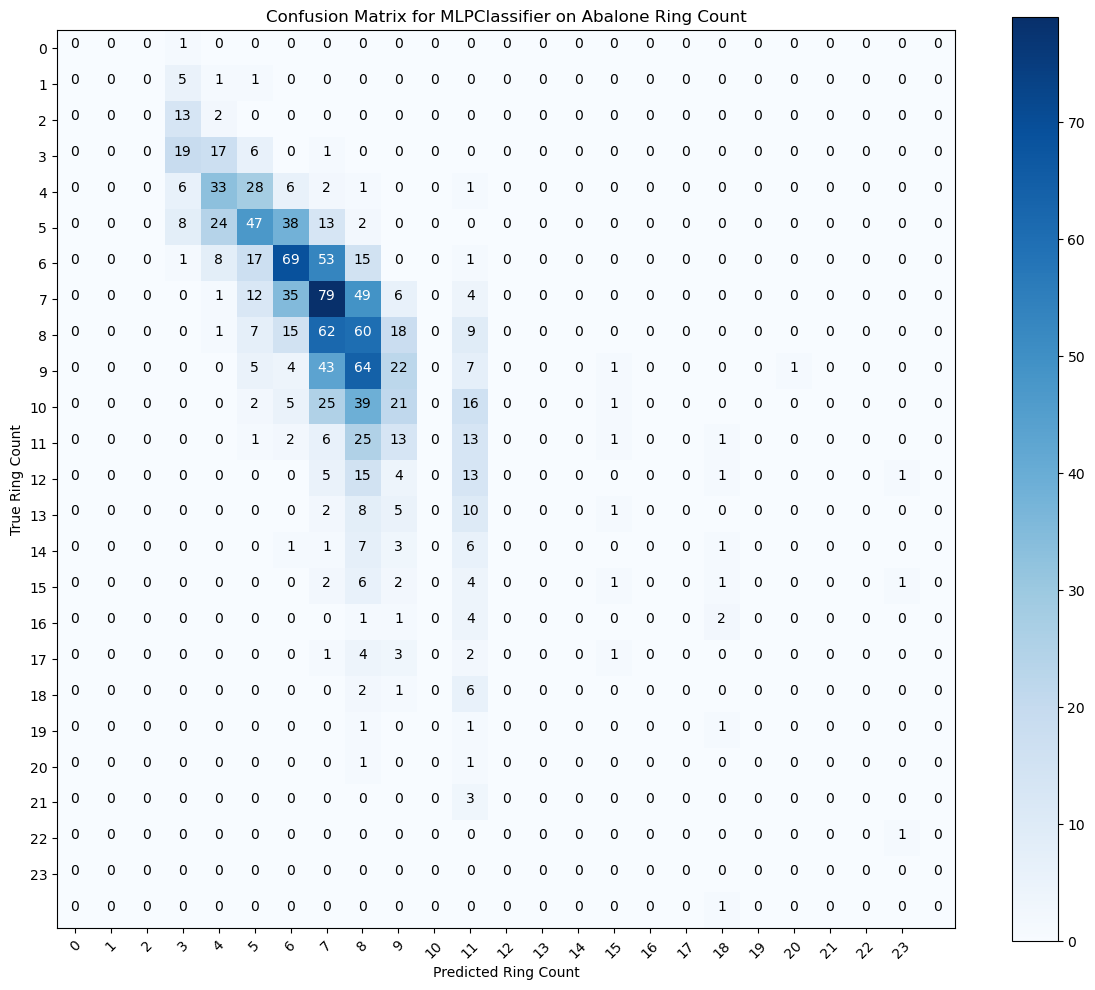

In [52]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MLPClassifier on Abalone Ring Count')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, tick_marks, rotation=45)
plt.yticks(tick_marks, tick_marks)

# Labeling the plot
plt.xlabel('Predicted Ring Count')
plt.ylabel('True Ring Count')

# Adding the numbers inside the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Ensure the layout is tight
plt.tight_layout()
plt.show()